In [1]:
import numpy as np
import cv2
import os
import random

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path=r'D:\Deep-Learning Projects\Computer Vision\Cat vs dog\train'

In [22]:
import shutil
cat_dir = os.path.join(path, 'cats')
dog_dir = os.path.join(path, 'dogs')

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for filename in os.listdir(path):
    if filename.lower().startswith('cat') and filename.endswith(('.jpg', '.jpeg', '.png')):
        shutil.move(os.path.join(path, filename), os.path.join(cat_dir, filename))
    elif filename.lower().startswith('dog') and filename.endswith(('.jpg', '.jpeg', '.png')):
        shutil.move(os.path.join(path, filename), os.path.join(dog_dir, filename))

## 🐱🐶 Organizing Cat and Dog Images into Separate Folders

This code takes a folder containing cat and dog images (e.g., `cat.0.jpg`, `dog.1.jpg`, etc.) and organizes them into two separate folders: `cats` and `dog......os.path.join() creates proper paths for cats and dogs folders inside your train directory.

os.makedirs() creates the folders cats and dogs if they don't already exist.`.tion

In [4]:
category=['cats','dogs']

In [5]:
data=[]

for i in category:
    folder=os.path.join(path,i)

    for image in os.listdir(folder):
        
        label=category.index(i)
        filepath=os.path.join(folder,image)
        im_arr=cv2.imread(filepath)
        im_arr=cv2.resize(im_arr,(100,100))
        data.append([im_arr,label])

1.iterates over cats and dogs

2.takes full path in folder...path+cats then path+dogs

3.for each cat/dog takes file path

4.reads the image,resizes it

5.appends image,label in data

In [6]:
print(data[20567])

print(data[20567][1])#label


[array([[[ 96,  88,  99],
        [108, 104, 116],
        [117, 123, 138],
        ...,
        [ 40,  40,  40],
        [ 26,  30,  24],
        [ 31,  35,  29]],

       [[188, 183, 198],
        [207, 207, 225],
        [ 75,  73,  93],
        ...,
        [ 42,  41,  43],
        [ 40,  41,  45],
        [ 38,  39,  43]],

       [[118,  99, 108],
        [163, 166, 174],
        [194, 200, 210],
        ...,
        [ 46,  45,  47],
        [ 45,  47,  48],
        [ 43,  45,  46]],

       ...,

       [[249, 240, 231],
        [251, 242, 233],
        [252, 243, 234],
        ...,
        [ 27,  19,  29],
        [ 49,  46,  48],
        [ 46,  43,  45]],

       [[242, 233, 224],
        [244, 235, 226],
        [250, 241, 232],
        ...,
        [ 23,  14,  27],
        [ 18,  15,  17],
        [ 11,   8,  10]],

       [[249, 241, 238],
        [247, 236, 232],
        [247, 236, 228],
        ...,
        [ 17,  20,  18],
        [ 13,  11,  11],
        [ 11,   9,   9]

In [7]:
random.shuffle(data) ###cats and dogs are mixed randomly

In [8]:
X=[]
y=[]

for features,labels in data:
    X.append(features)
    y.append(labels)

In [9]:
X = np.array(X, dtype=np.float32) / 255.0 #scaling

y=np.array(y)

In [11]:
print(X.shape,y.shape)

(25000, 100, 100, 3) (25000,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train.shape

(20000, 100, 100, 3)

In [14]:
y_train.shape

(20000,)

In [15]:
from keras import Sequential
from keras.layers  import Conv2D,MaxPooling2D,Flatten,Dense, Dropout

In [16]:
model = Sequential()

# Convolutional layer + pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # To prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification: 0 = cat, 1 = dog

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)      

In [17]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10


625/625 [==============================] - 66s 101ms/step - loss: 0.6628 - accuracy: 0.5882 - val_loss: 0.5834 - val_accuracy: 0.6870
Epoch 2/10
625/625 [==============================] - 58s 93ms/step - loss: 0.5365 - accuracy: 0.7330 - val_loss: 0.4587 - val_accuracy: 0.7948
Epoch 3/10
625/625 [==============================] - 58s 94ms/step - loss: 0.4399 - accuracy: 0.7998 - val_loss: 0.4059 - val_accuracy: 0.8160
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3806 - accuracy: 0.8341 - val_loss: 0.4346 - val_accuracy: 0.8144
Epoch 5/10
625/625 [==============================] - 61s 98ms/step - loss: 0.3320 - accuracy: 0.8572 - val_loss: 0.3440 - val_accuracy: 0.8506
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.2920 - accuracy: 0.8766 - val_loss: 0.3389 - val_accuracy: 0.8502
Epoch 7/10
625/625 [==============================] - 60s 96ms/step - loss: 0.2492 - accuracy: 0.8946 - val_loss: 0.3393 - val_accura

157/157 [==============================] - 6s 38ms/step


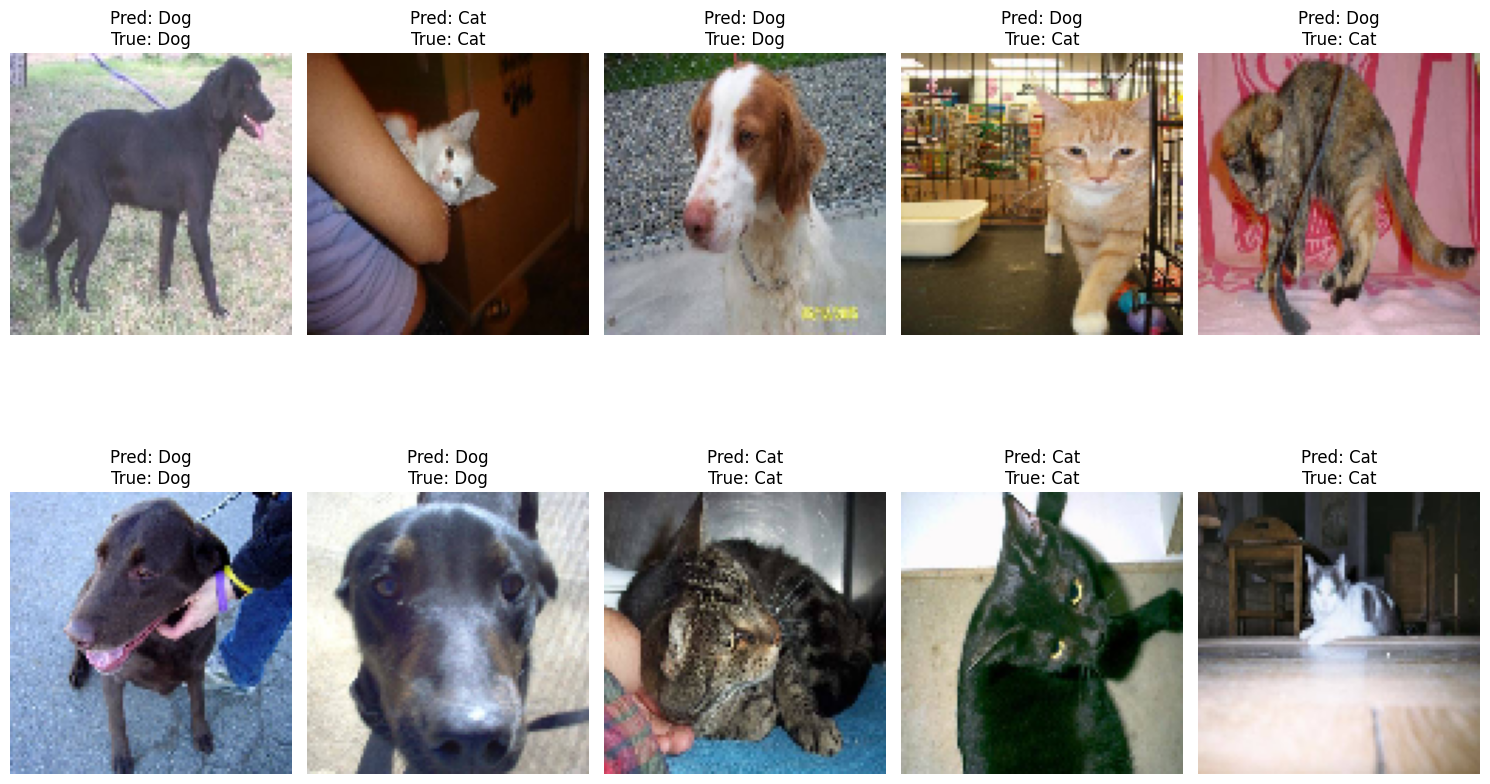

In [18]:
import matplotlib.pyplot as plt

# Get predictions on test data
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to class labels (0 or 1)

# Class label map
class_names = {0: 'Cat', 1: 'Dog'}

# Display 10 sample predictions
plt.figure(figsize=(15, 10))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor((X_test[i] * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(f"Pred: {class_names[y_pred_labels[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


157/157 [==============================] - 6s 33ms/step


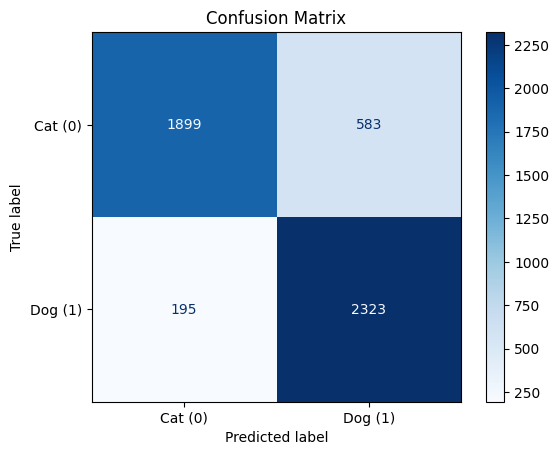


Classification Report:

              precision    recall  f1-score   support

         Cat       0.91      0.77      0.83      2482
         Dog       0.80      0.92      0.86      2518

    accuracy                           0.84      5000
   macro avg       0.85      0.84      0.84      5000
weighted avg       0.85      0.84      0.84      5000



In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat (0)", "Dog (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Optional: Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


In [21]:
model.save("cat_dog_model.h5")


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
